In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Heatmaps for every tested phenotype

As we have two hyper parameters for the random forest model, I will display the result thanks to a heatmap for the correletion and for the MAE as it will illustrate the dependency to both hyperparameters in one graph

In [2]:
def results_heatmap(corr_df: pd.DataFrame, MAE_df: pd.DataFrame, phenotype_name: int):
    # Update the dataframes to upgrade the resulting graph
    corr_df.columns = list(map(lambda a: a.split("=")[1] ,corr_df.columns))
    corr_df.index = list(map(lambda a: a.split("=")[1] ,corr_df.index))
    
    MAE_df.columns = list(map(lambda a: a.split("=")[1] ,MAE_df.columns))
    MAE_df.index = list(map(lambda a: a.split("=")[1] ,MAE_df.index))
    
    subtitle_font =  {"size": 14}
    title_font = {"weight": "bold" ,"size": 18}
    
    fig,(ax1, ax2) = plt.subplots(1,2, figsize=(17 , 6.5))

    fig.suptitle(f"Heatmap for phenotype {phenotype_name}", font=title_font)
    sns.heatmap(corr_df, annot= True, cmap = "YlGnBu", fmt= ".3f", linecolor="black", linewidths=0.5, ax= ax1)
    plt.yticks(rotation=0)
    ax1.set_title("Pearson correlation", font=subtitle_font)
    ax1.set_xlabel("min_sample_split parameter")
    ax1.set_ylabel("max_depth parameter")
    ax1.tick_params(rotation=0)

    sns.heatmap(MAE_df, annot = True, cmap = "YlGnBu", fmt= ".3f", linecolor="black", linewidths=0.5, ax=ax2)
    ax2.set_title("Mean absolute error", font=subtitle_font)
    ax2.set_ylabel("max_depth parameter")
    ax2.set_xlabel("min_sample_split parameter")
    ax2.tick_params(rotation=0)
    plt.show()

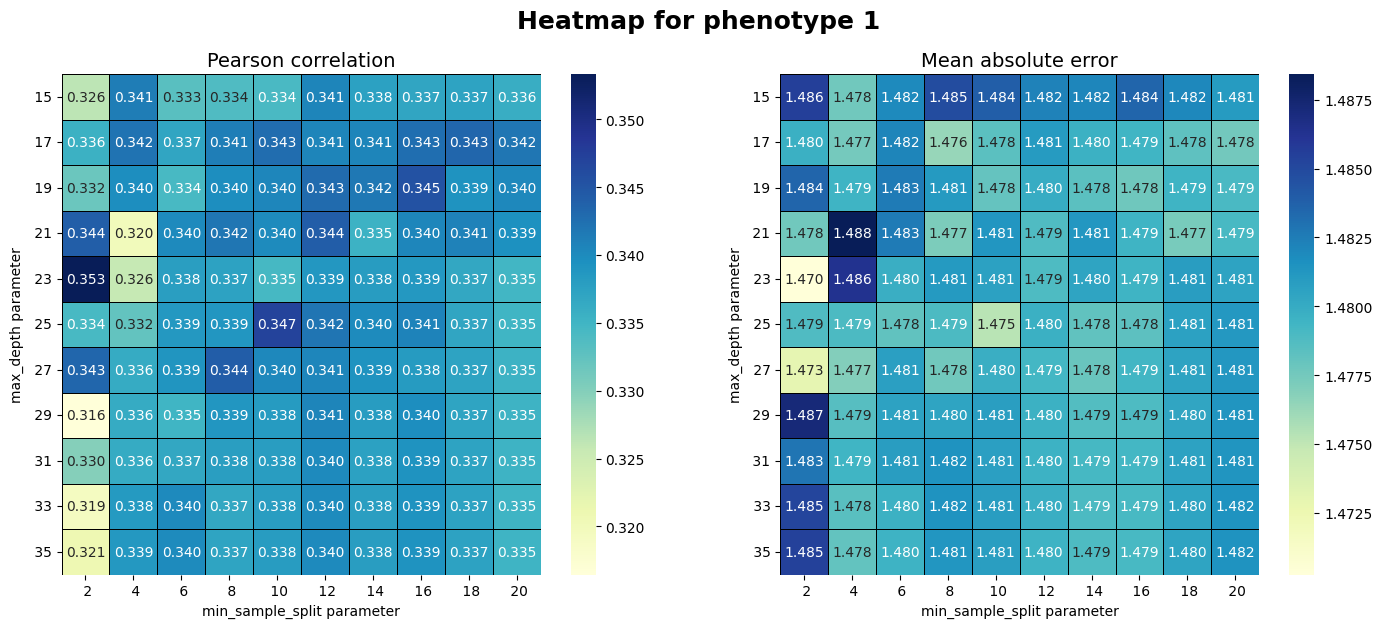

In [3]:
corr_pheno1_df = pd.read_csv("Results/random_forest_all_results_corr_pheno_1.csv", index_col = 0)
MAE_pheno1_df = pd.read_csv("Results/random_forest_all_results_MAE_pheno_1.csv", index_col = 0)
results_heatmap(corr_pheno1_df, MAE_pheno1_df, 1)

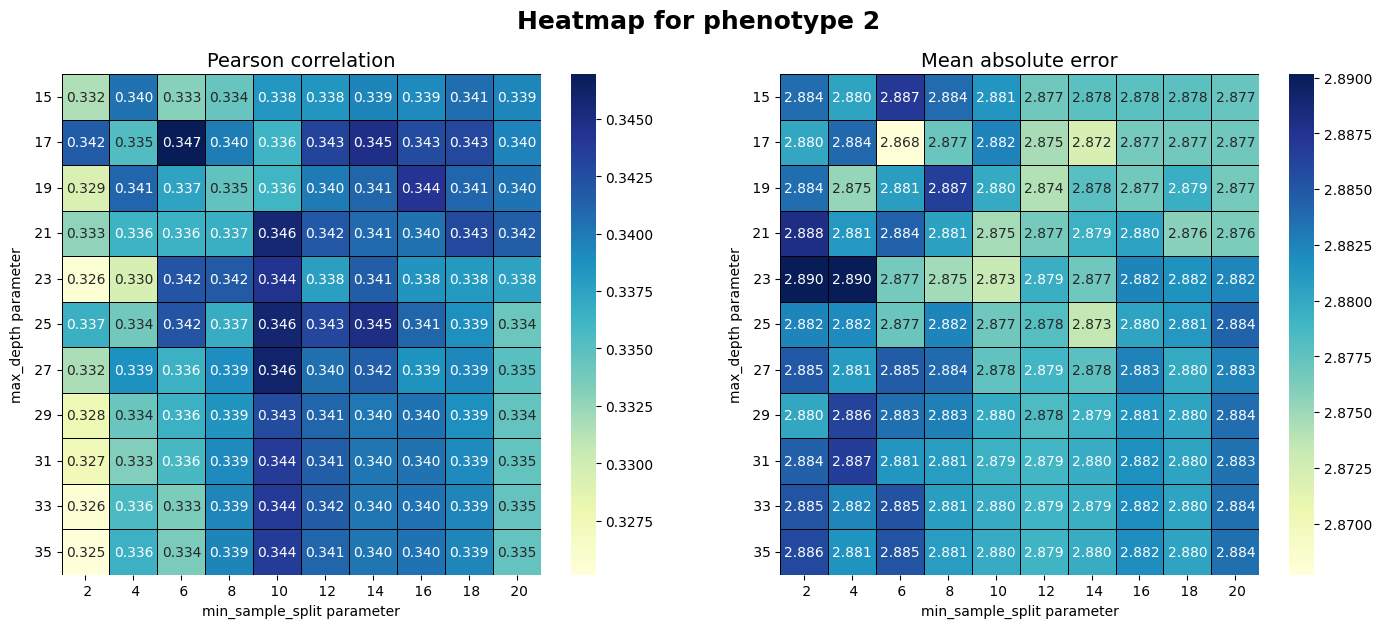

In [4]:
corr_pheno2_df = pd.read_csv("Results/random_forest_all_results_corr_pheno_2.csv", index_col = 0)
MAE_pheno2_df = pd.read_csv("Results/random_forest_all_results_MAE_pheno_2.csv", index_col = 0)
results_heatmap(corr_pheno2_df, MAE_pheno2_df, 2)

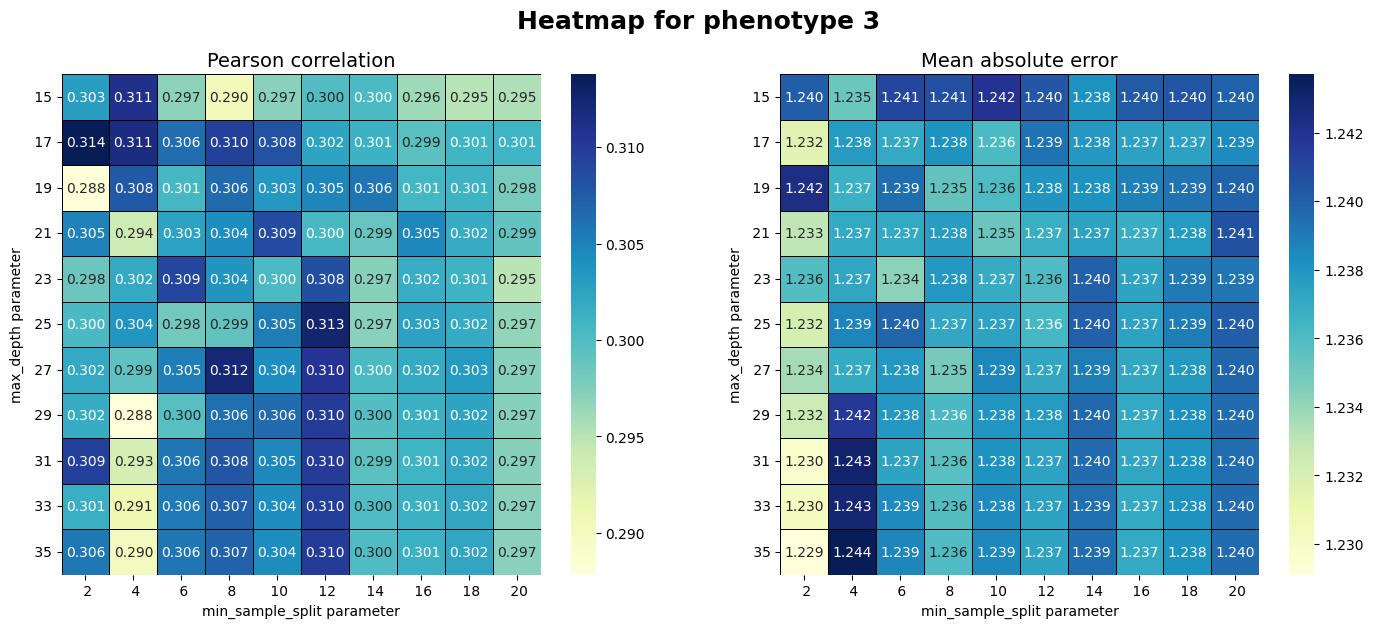

In [5]:
corr_pheno3_df = pd.read_csv("Results/random_forest_all_results_corr_pheno_3.csv", index_col = 0)
MAE_pheno3_df = pd.read_csv("Results/random_forest_all_results_MAE_pheno_3.csv", index_col = 0)
results_heatmap(corr_pheno3_df, MAE_pheno3_df, 3)

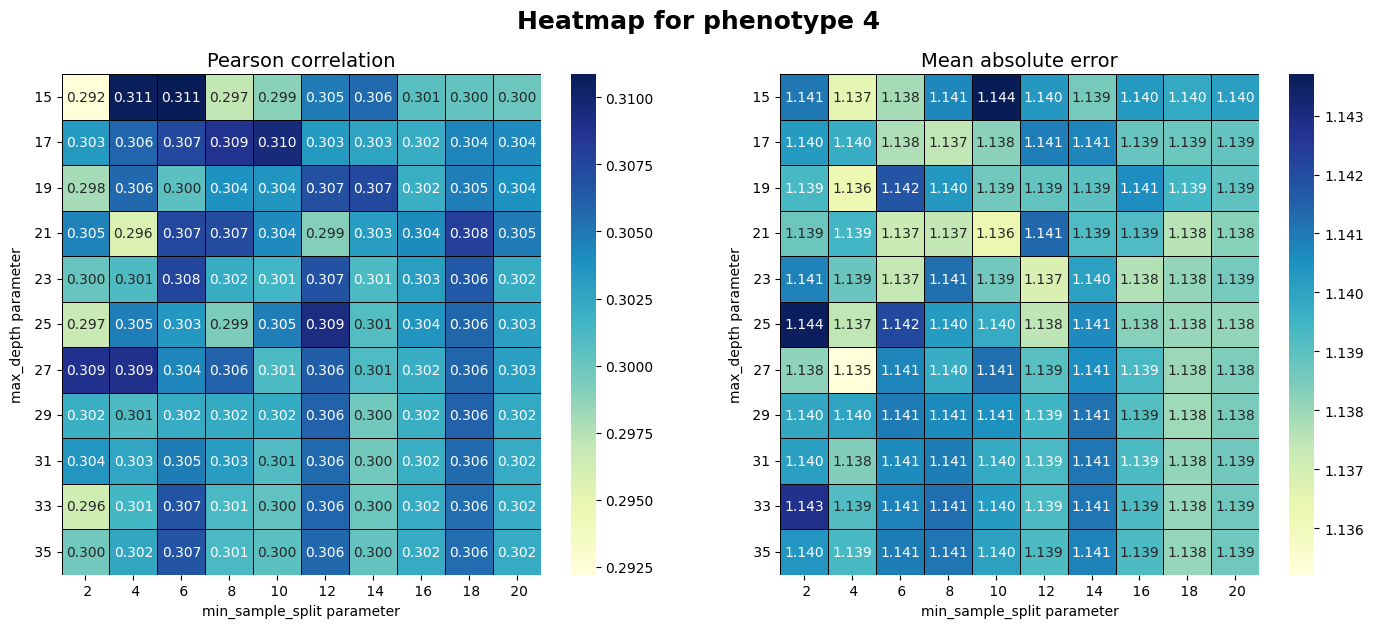

In [6]:
corr_pheno4_df = pd.read_csv("Results/random_forest_all_results_corr_pheno_4.csv", index_col = 0)
MAE_pheno4_df = pd.read_csv("Results/random_forest_all_results_MAE_pheno_4.csv", index_col = 0)
results_heatmap(corr_pheno4_df, MAE_pheno4_df, 4)

### Conclusions/analysis:

 - The hyperparameter choice don't impact much the results in both the correlation and the mean absolute error.
 - Setting a higher value for min_sample_split enable to reduce the variability in the results.
 - With a high min_sample_split_parameter, having a big max_depth parameter is useless and yield always to the same results (as the trees ares fully expanded and don't reach the high max_depth).
 - Great values obtained with a low min_sample_split may be obtained thanks to overfitting.

# Choice of the best hyper parameter combinaision

To determine the best combinaison of hyperparameters, I decide to evaluate the sum on all phenotypes (to avoid a choice that lead to overfitting). For the correlation, we take the argmax and for the MAE, we take the argmin.

In [7]:
sum_corr = corr_pheno1_df.add(corr_pheno2_df, fill_value= 0).add(corr_pheno3_df).add(corr_pheno4_df)
sum_corr = sum_corr.to_numpy()
best_corr = np.unravel_index(np.argmax(sum_corr, axis=None), sum_corr.shape)

sum_MAE = MAE_pheno1_df.add(MAE_pheno2_df, fill_value= 0).add(MAE_pheno3_df).add(MAE_pheno4_df)
sum_MAE = sum_MAE.to_numpy()
best_MAE = np.unravel_index(np.argmin(sum_MAE, axis=None), sum_MAE.shape)

if best_corr == best_MAE:
    print("The best hyperparameter choice for both metrics is : ")
    print(f"    - Max_depth: {corr_pheno1_df.index[best_corr[0]]}")
    print(f"    - Min_sample_split: {corr_pheno1_df.columns[best_corr[1]]}")
else:
    print("The best hyperparameter choice for correlation is : ")
    print(f"    - Max_depth: {corr_pheno1_df.index[best_corr[0]]}")
    print(f"    - Min_sample_split: {corr_pheno1_df.columns[best_corr[1]]}")
    print(f"Which gives a sum of correlation of {sum_corr[best_corr]:.8f} and a sum of MAE of {sum_MAE[best_corr]:.8f}")
    print("----------------------------------------------------")
    print("The best hyperparameter choice for MAE is : ")
    print(f"    - Max_depth: {corr_pheno1_df.index[best_MAE[0]]}")
    print(f"    - Min_sample_split: {corr_pheno1_df.columns[best_MAE[1]]}")
    print(f"Which gives a sum of correlation of {sum_corr[best_MAE]:.8f} and a sum of MAE of {sum_MAE[best_MAE]:.8f}")

The best hyperparameter choice for correlation is : 
    - Max_depth:  25
    - Min_sample_split:  12
Which gives a sum of correlation of 1.30680585 and a sum of MAE of 6.73155215
----------------------------------------------------
The best hyperparameter choice for MAE is : 
    - Max_depth:  17
    - Min_sample_split:  6
Which gives a sum of correlation of 1.29770543 and a sum of MAE of 6.72461798


As the correlation is considered as more important than MAE in genomic selection and the difference in MAE is less than the difference in correlation. I conclude that the best hyper parameters choice for random forest is max_depth = 25 and min_sample_split = 12